## **Week 1 Assignment**
### The goal is to train a simple model for predicting the duration of a ride.

### The dataset used in this notebook is the Jan and Feb 2022 NYC taxi dataset (Train and Test data respectively) 

In [1]:
# Import libraries

import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data

df_train = pd.read_parquet('data\yellow_tripdata_2022-01.parquet')
df_test = pd.read_parquet('data\yellow_tripdata_2022-02.parquet')

In [3]:
df_train.shape, df_test.shape

((2463931, 19), (2979431, 19))

In [4]:
df_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979431 entries, 0 to 2979430
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
# Derive duration of the trips

def get_duration(df_train, df_test):
    df_train['duration'] = df_train.tpep_dropoff_datetime - df_train.tpep_pickup_datetime
    df_train.duration = df_train.duration.apply(lambda td: td.total_seconds() / 60)
    
    df_test['duration'] = df_test.tpep_dropoff_datetime - df_test.tpep_pickup_datetime
    df_test.duration = df_test.duration.apply(lambda td: td.total_seconds() / 60)
    
    return df_train, df_test

df_train, df_test = get_duration(df_train, df_test)

In [8]:
df_train.shape, df_test.shape

((2463931, 20), (2979431, 20))

In [9]:
df_train.duration.describe()

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

In [10]:
# Remove outliers

df_train = df_train[(df_train.duration >= 1) & (df_train.duration <= 60)]
df_test = df_test[(df_test.duration >= 1) & (df_test.duration <= 60)]

len(df_train), len(df_test)

(2421440, 2918187)

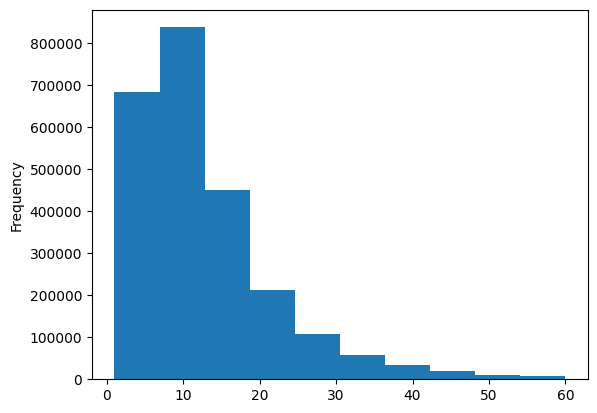

In [11]:
df_train.duration.plot(kind = 'hist');

In [12]:
cols = ['PULocationID', 'DOLocationID']
target = ['duration']

In [13]:
df_train2 = df_train[cols].astype(str)
df_test2 = df_test[cols].astype(str)

dv = DictVectorizer()

# Convert dataframes to lists of dictionaries 
train_dicts = df_train2.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

test_dicts = df_test2.to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [14]:
# Get the dimensionality
num_cols = X_train.shape[1]
num_cols

515

In [17]:
# Define the target variables on the train and test sets
y_train = df_train[target].values
y_test = df_test[target].values

#### **Using a plain Linear Regression model with default parameters**

In [18]:
lr = LinearRegression()

##### RMSE of the model on the training data

In [19]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

6.986191065500608

##### RMSE of the model on the test data

In [20]:
y_pred = lr.predict(X_test)

mean_squared_error(y_test, y_pred, squared=False)

7.786408015215065